In [13]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#label encoder to convert string to numeric values for the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [4]:
#Convert input to numpy array
data = data.to_numpy()

In [5]:
#seperate feature and target variables
X = data[:,0:4]
Y = data[:,4]

print("Features before scaling:\n", X[:5,:])
print("\nTarget before scaling:\n", Y[:5])

Features before scaling:
 [[1.  5.1 3.5 1.4]
 [2.  4.9 3.  1.4]
 [3.  4.7 3.2 1.3]
 [4.  4.6 3.1 1.5]
 [5.  5.  3.6 1.4]]

Target before scaling:
 [0.2 0.2 0.2 0.2 0.2]


In [6]:
#create a scaler model that is fit on the input data
scaler = StandardScaler().fit(X)

#scale the numeric feature variables
X = scaler.transform(X)

#convert target variable as a one-hot-encoding array
Y = tf.keras.utils.to_categorical(Y,3)

print("Features after scaling:\n", X[:5,:])
print("\nTarget after one-hot-encoding:\n", Y[:5,:])

Features after scaling:
 [[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]]

Target after one-hot-encoding:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.10)

print("Train Test Dimensions:\n")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Train Test Dimensions:

(135, 4) (135, 3) (15, 4) (15, 3)


### Creating ANN Model

In [8]:
from tensorflow import keras

#number of classes in the target variable
num = 3

#Create a sequential model in keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                             #Number of nodes
                             input_shape=(4,),                #Number of input variables
                             name='Hidden-Layer-1',           #Logical name
                             activation='relu'))              #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                            name='Hidden-Layer-2',
                            activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(num,
                            name='Output-Layer',
                            activation='softmax'))

#Compile the model with lass and metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Training and Evaluating the Model

In [9]:
#make it verbose so we can see the progress
Verbose=1

#setup hyperparameters for trainig

Batch_Size=16
Epochs=10
Validation_Split=0.2

print("Training progress:\n")


#Fit the model. This will perform the entire trainig cycle, including forward propagation, loss computation, 
#backward propagation and gradient descent. Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X,
                 Y,
                 batch_size = Batch_Size,
                 epochs = Epochs,
                 verbose = Verbose,
                 validation_split = Validation_Split)

Training progress:

Epoch 1/10
8/8 [==============================] - 1s 28ms/step - loss: 0.7749 - accuracy: 0.8250 - val_loss: 0.8012 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.9083 - val_loss: 0.7184 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3449 - accuracy: 0.9333 - val_loss: 0.6777 - val_accuracy: 0.6333
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.9417 - val_loss: 0.6435 - val_accuracy: 0.7333
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2420 - accuracy: 0.9167 - val_loss: 0.5868 - val_accuracy: 0.7000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2138 - accuracy: 0.9583 - val_loss: 0.5468 - val_accuracy: 0.7667
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.9333 - val_loss: 0.5418 - val_accuracy: 0.7667
Epoch 8/10
8/

Accuracy during training:



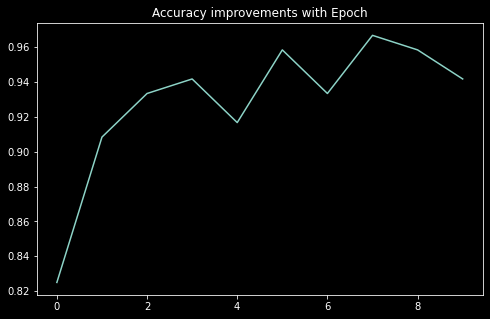

In [10]:
print("Accuracy during training:\n")
import matplotlib.pyplot as plt
plt.style.use("dark_background")


#Plot accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [11]:
print("Evaluation against Test Dataset:\n")
model.evaluate(X_test,Y_test)

Evaluation against Test Dataset:

1/1 [==============================] - 0s 22ms/step - loss: 0.2164 - accuracy: 0.8667


[0.21644292771816254, 0.8666666746139526]

### Saving and Loading Models

In [14]:
#Saving a model
model.save('Iris_model')

#Loading a model
loaded_model = keras.models.load_model('Iris_model')

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: Iris_model\assets


INFO:tensorflow:Assets written to: Iris_model\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions with Deep learning Models

In [15]:
#Raw prediction data
prediction_input = [[6.6, 3., 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output(Probabilities) :", raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 78ms/step
Raw Prediction Output(Probabilities) : [[9.9999917e-01 8.6872717e-07 1.5715516e-08]]
Prediction is  ['Iris-setosa']
